In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
a = 1.0
ds = 0.1
values = []

for i in range(100):
    a = a * math.exp(-a * ds)
    values.append(a)
    #print(f'iteration {i}: a = {a}')

plt.plot(values)
plt.xlabel('Iteration')
plt.ylabel('a value')
plt.title('Evolution of a over iterations')
plt.show()

In [16]:
import random
import math
from PIL import Image

perm = list(range(256))
random.shuffle(perm)
perm += perm
dirs = [(math.cos(a * 2.0 * math.pi / 256),
         math.sin(a * 2.0 * math.pi / 256))
         for a in range(256)]

def randomise_vals():
    perm = list(range(256))
    random.shuffle(perm)
    perm += perm
    dirs = [(math.cos(a * 2.0 * math.pi / 256),
             math.sin(a * 2.0 * math.pi / 256))
             for a in range(256)]


def surflet(gridX, gridY, x, y, per):
        distX, distY = abs(x-gridX), abs(y-gridY)
        
        polyX = 1 - 6*distX**5 + 15*distX**4 - 10*distX**3
        polyY = 1 - 6*distY**5 + 15*distY**4 - 10*distY**3
        
        hashed = perm[perm[int(gridX)%per] + int(gridY)%per]
        grad = (x-gridX)*dirs[hashed][0] + (y-gridY)*dirs[hashed][1]
        
        return polyX * polyY * grad
        #return grad

def noise(x, y, per):
    intX, intY = int(x), int(y)
    
    return (
        surflet(intX+0, intY+0, x, y, per) + 
        surflet(intX+1, intY+0, x, y, per) +
        surflet(intX+0, intY+1, x, y, per) +
        surflet(intX+1, intY+1, x, y, per)
    )

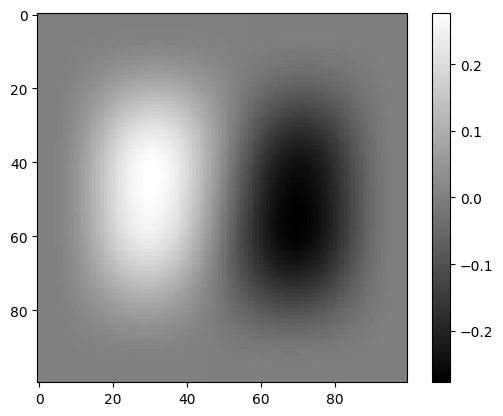

In [4]:
gridX = 1
gridY = 1
surf = np.zeros((100,100))

for x in range(surf.shape[0]):
    for y in range(surf.shape[1]):
        xTex = (x/50) - 1
        yTex = (y/50) - 1
        
        surf[x,y] = surflet(gridX, gridY, gridX + xTex, gridY + yTex, 2)
        
        
plt.imshow(surf, cmap = 'gray')
plt.colorbar()

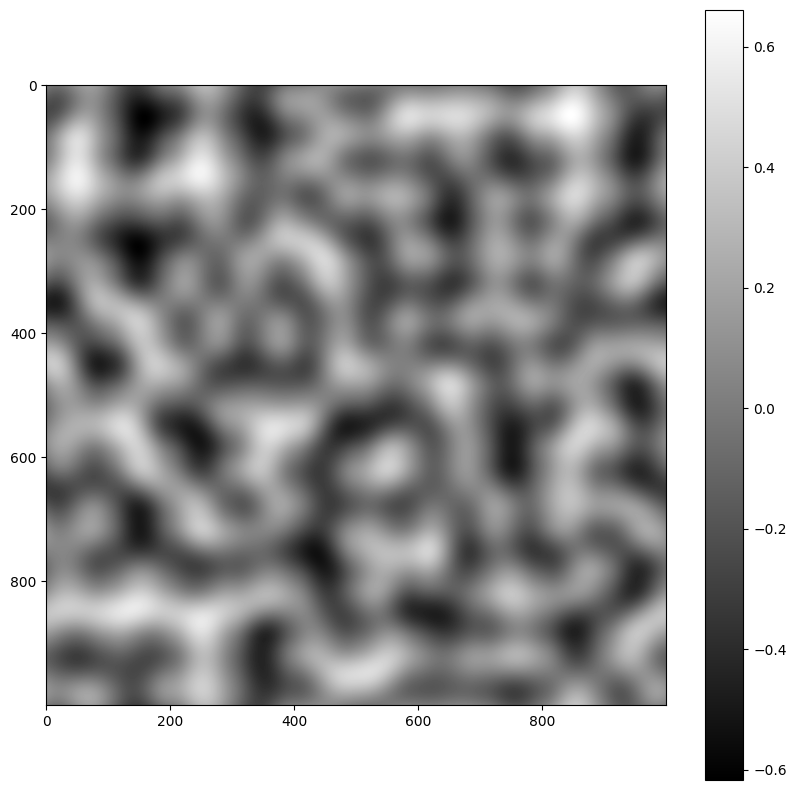

In [5]:
n = np.zeros((1000, 1000))
for x in range(n.shape[0]):
    for y in range(n.shape[1]):
        xTex = x / 100
        yTex = y / 100
        n[x,y] = noise(xTex, yTex, 10)

plt.figure(figsize=(10, 10))
plt.imshow(n, cmap = 'gray')
plt.colorbar()

In [57]:
import random
import math
import numpy as np

perm = list(range(256))
random.shuffle(perm)
perm += perm
dirs = [(math.cos(a * 2.0 * math.pi / 256),
         math.sin(a * 2.0 * math.pi / 256),
         math.cos(a * 2.0 * math.pi / 256))
         for a in range(256)]

def surflet3d(gridX, gridY, gridZ, x, y, z, per):
        distX, distY, distZ = abs(x-gridX), abs(y-gridY), abs(z - gridZ)
        
        polyX = 1 - 6*distX**5 + 15*distX**4 - 10*distX**3
        polyY = 1 - 6*distY**5 + 15*distY**4 - 10*distY**3
        polyZ = 1 - 6*distZ**5 + 15*distZ**4 - 10*distZ**3
        
        hashed = perm[perm[int(gridX)%per] + int(gridY)%per + int(gridZ)%per]
    
        grad = (x-gridX)*dirs[hashed][0] + (y-gridY)*dirs[hashed][1] + (z-gridZ)*dirs[hashed][2]
        
        return polyX * polyY * polyZ * grad

def noise3d(x, y, z, per):
    intX, intY, intZ = int(x), int(y), int(z)
    
    return (
        surflet3d(intX+0, intY+0, intZ+0, x, y, z, per) + 
        surflet3d(intX+0, intY+0, intZ+1, x, y, z, per) + 
        surflet3d(intX+0, intY+1, intZ+0, x, y, z, per) + 
        surflet3d(intX+0, intY+1, intZ+1, x, y, z, per) + 
        surflet3d(intX+1, intY+0, intZ+0, x, y, z, per) + 
        surflet3d(intX+1, intY+0, intZ+1, x, y, z, per) + 
        surflet3d(intX+1, intY+1, intZ+0, x, y, z, per) + 
        surflet3d(intX+1, intY+1, intZ+1, x, y, z, per)
    )

In [ ]:
s3d = np.zeros((100,100,100))
gridX = 1
gridY = 1
gridZ = 1

for x in range(s3d.shape[0]):
    for y in range(s3d.shape[1]):
        for z in range(s3d.shape[2]):
            xPos = (x / 50) - 1
            yPos = (y / 50) - 1
            zPos = (z / 50) - 1
            s3d[x,y,z] = surflet3d(gridX, gridY, gridZ, gridX + xPos, gridY + yPos, gridZ + zPos, 10)
 

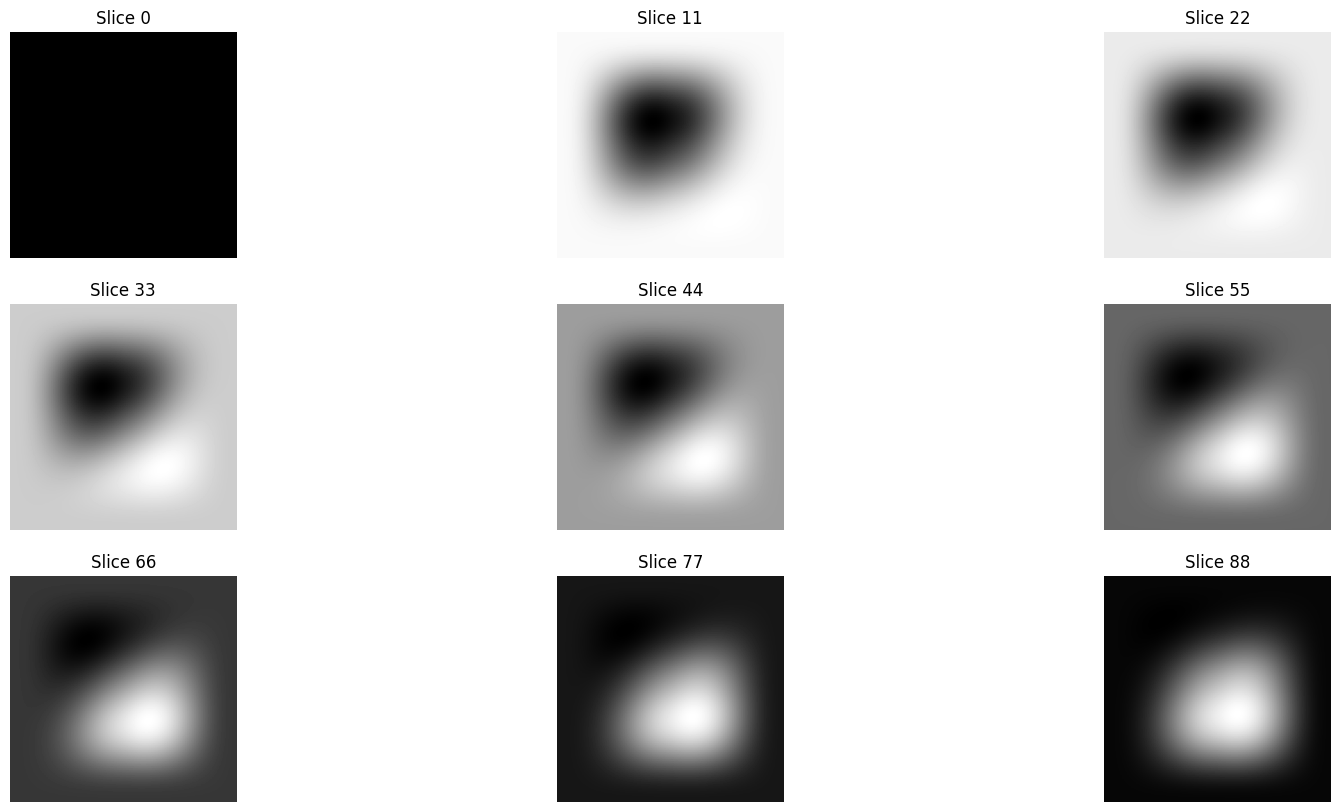

In [52]:
def plot_slices(slice_rows, slice_cols, data, figsize=(20,10)):
    # Number of slices to display
    num_slices = slice_rows * slice_cols
    
    # Create a figure and subplots
    fig, axes = plt.subplots(slice_rows, slice_cols, figsize=(20,10))
    
    # Iterate over slices (change the range if you want to see different slices)
    
    for r in range(slice_rows):
        for c in range(slice_cols):
            i = c + r * slice_cols 
            #print(r,c, i)
            slice_index = i * (data.shape[2] // num_slices)
            slice_2d = data[:, :, slice_index]
        
            # Display each slice
            ax = axes[r,c]
            im = ax.imshow(slice_2d, cmap='gray')  # 'gray' colormap, you can choose others
            ax.set_title(f"Slice {slice_index}")
            ax.axis('off')
    
    # Show the plot
    plt.show()

plot_slices(3,3,s3d, (10,10))

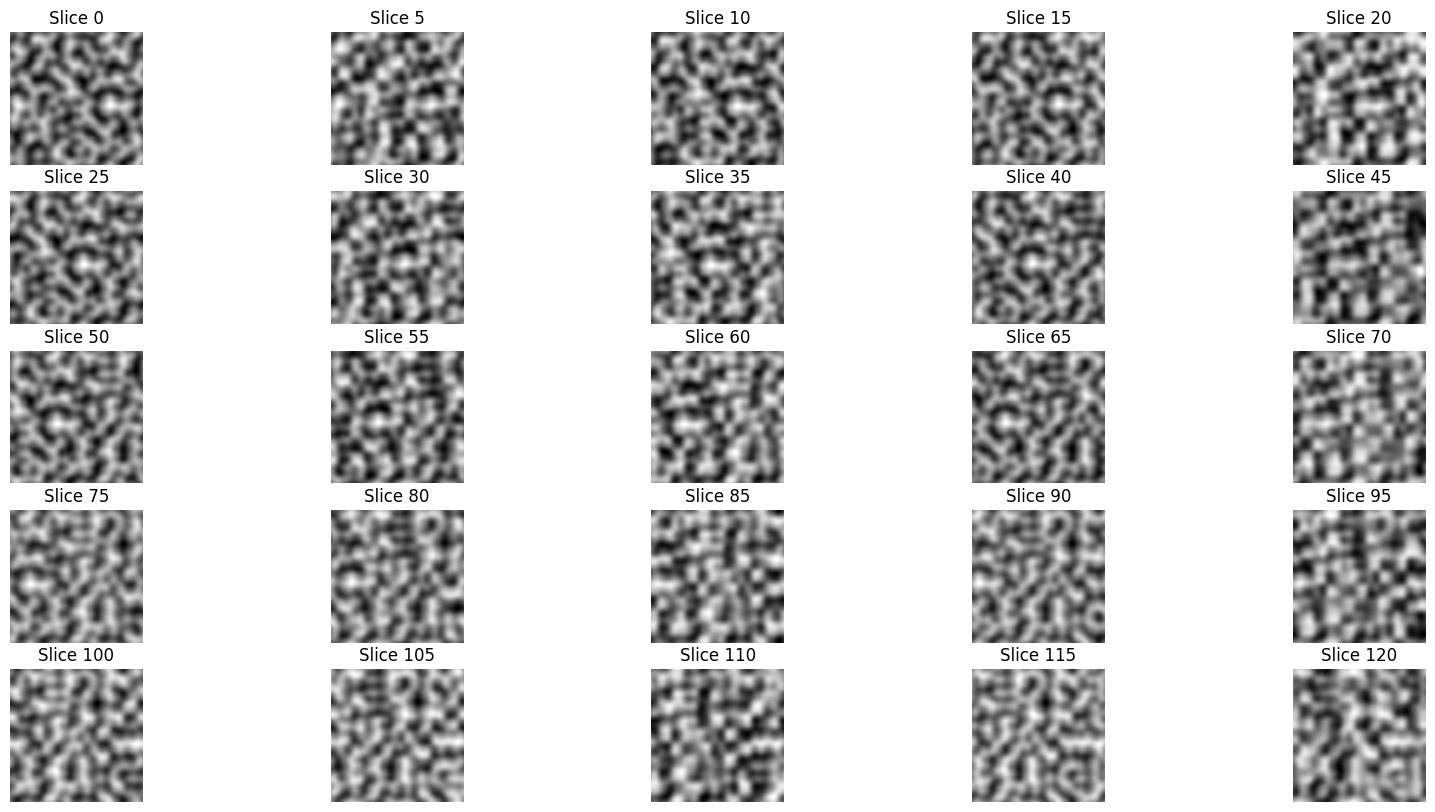

In [102]:
n = np.zeros((128, 128, 128))
for x in range(n.shape[0]):
    for y in range(n.shape[1]):
        for z in range(n.shape[2]):
            xTex = x / 12.8
            yTex = y / 12.8
            zTex = z / 12.8
            n[x,y,z] = noise3d(xTex, yTex, zTex, 10)

plot_slices(5,5,n, (10,10))

In [103]:
print(n.shape, n.max(), n.min())

(128, 128, 128) 0.6729514792591258 -0.6900386354022736


In [104]:
n_uint8 = ((n - n.min()) / (n.max() - n.min()) * 255).astype(np.uint8)

In [105]:
print(n_uint8.shape, n_uint8.max(), n_uint8.min())

(128, 128, 128) 255 0


In [106]:
n_uint8.transpose().tofile('perlin_3d_T_10.bin')

In [107]:
n_uint8[0:10,0,0]

array([129, 121, 111,  99,  87,  77,  71,  70,  74,  83], dtype=uint8)

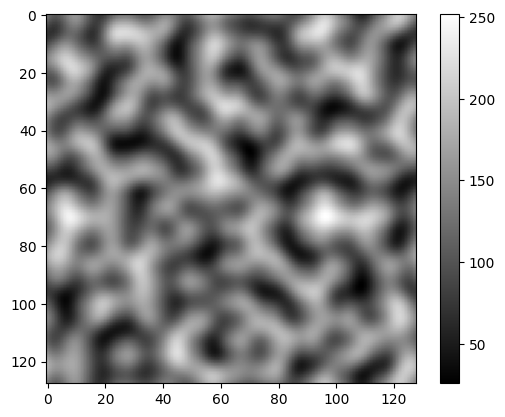

In [108]:
plt.imshow(n_uint8[:,:,0], cmap = 'gray')
plt.colorbar()

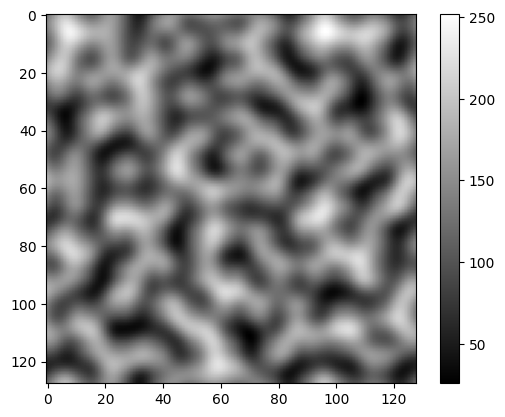

In [110]:
plt.imshow(np.concatenate([ n_uint8[64:,:,0], n_uint8[0:64,:,0]], axis=0), cmap = 'gray')
plt.colorbar()

# FBM Noise

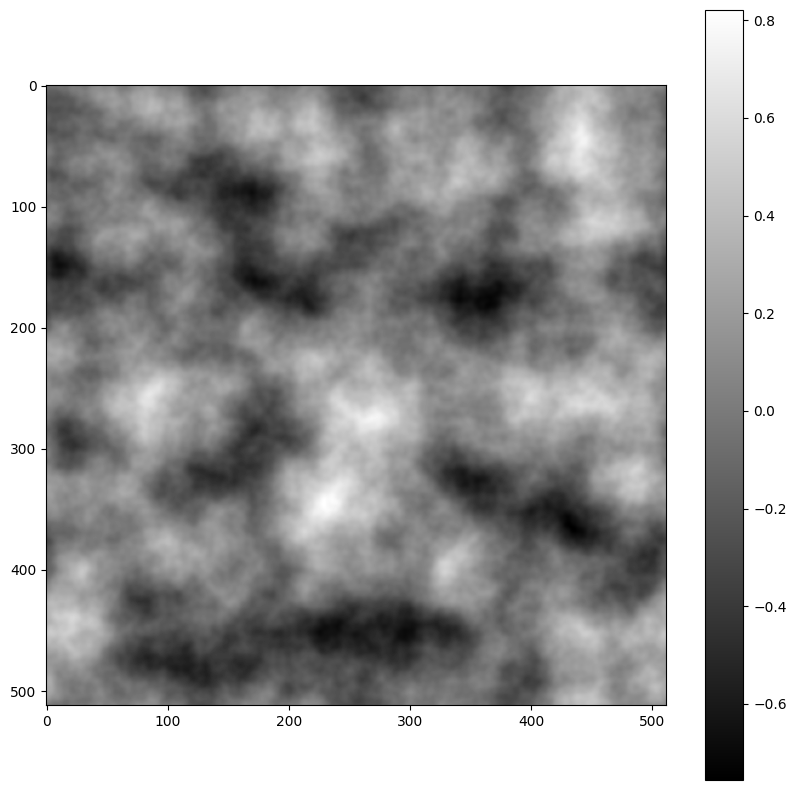

In [18]:
randomise_vals()

def fBm(x, y, per, octs):
    val = 0
    for o in range(octs):
        val += 0.5**o * noise(x*2**o, y*2**o, per*2**o)
    return val

fbm_noise = np.zeros((512,512))

for x in range(fbm_noise.shape[0]):
    for y in range(fbm_noise.shape[1]):
        fbm_noise[x,y] = fBm(x / (512/5), y / (512/5), 5, 5)

plt.figure(figsize=(10, 10))
plt.imshow(fbm_noise, cmap = 'gray')
plt.colorbar()

In [19]:
def save_to_file(n, filename):
    print(n.shape, n.max(), n.min())
    n = ((n - n.min()) / (n.max() - n.min()) * 255).astype(np.uint8)
    print(n.shape, n.max(), n.min())
    n.transpose().tofile(filename)

save_to_file(fbm_noise, 'fbm_noise_512_512.bin')

(512, 512) 0.8209667226282285 -0.7557552205454274
(512, 512) 255 0


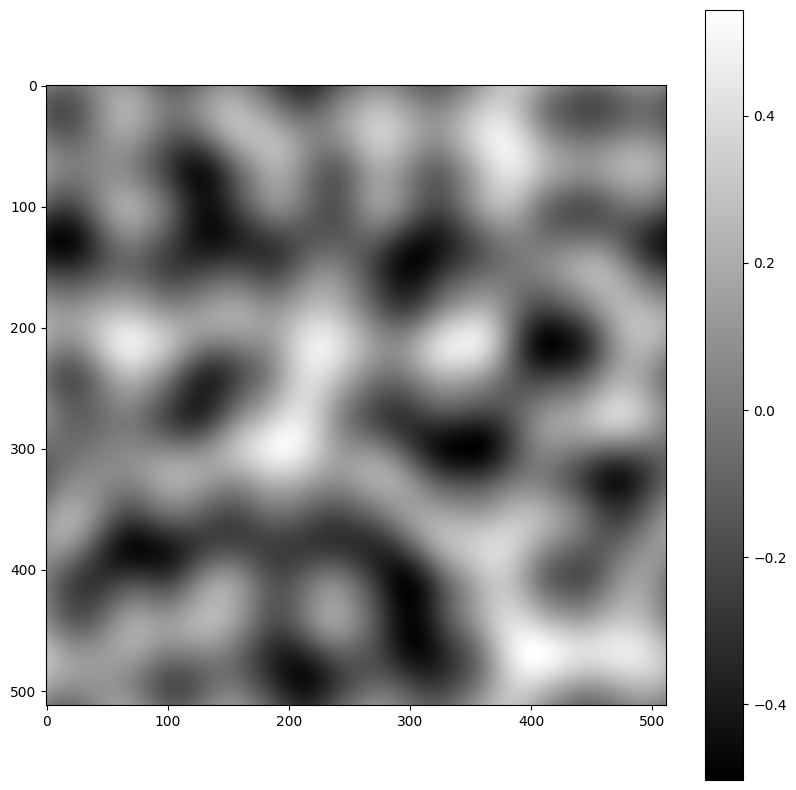

In [22]:
randomise_vals()

n = np.zeros((512, 512))
per = 6

for x in range(n.shape[0]):
    for y in range(n.shape[1]):
        xTex = x / (n.shape[0] / per)
        yTex = y / (n.shape[1] / per)
        n[x,y] = noise(xTex, yTex, per)

plt.figure(figsize=(10, 10))
plt.imshow(n, cmap = 'gray')
plt.colorbar()

In [23]:
save_to_file(n, 'perlin_noise_512_512_6.bin')

(512, 512) 0.5437620840523947 -0.5027349509668267
(512, 512) 255 0
